In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import re

In [3]:
df = pd.read_csv(r"C:\Users\USER\Downloads\product_sales (1).csv")
print(df.head())

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  


In [4]:
df.shape

(15000, 8)

In [5]:
df["sales_method"] = df["sales_method"].astype("category")

In [6]:
assert df["sales_method"].dtype == "category"

Text(0.5, 1.0, 'Visualization of commonly used sales_method')

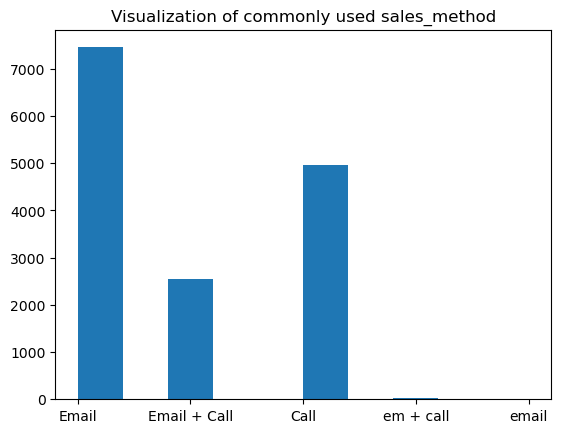

In [7]:
plt.hist(df["sales_method"])
plt.title("Visualization of commonly used sales_method")

In [8]:
df[df["sales_method"] == "em + call"]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
22,3,em + call,d72de17a-0d71-401b-b64a-dc4492b2b1ed,10,150.47,20,21,North Carolina
603,1,em + call,622b3c27-c6a3-4796-a89e-010599a21ee8,8,126.02,10,19,Ohio
954,5,em + call,c07b5315-e4aa-4f8c-ad2f-b12ac74dcca0,13,NaN,9,30,California
1260,4,em + call,0829c4e8-a3d4-49b3-947e-b5bde2ec2c0b,12,181.52,22,28,Maryland
1674,5,em + call,b2a5de5e-a76d-4e3f-b31c-cc82f0432cad,12,185.65,3,28,Washington
3598,4,em + call,3325c590-486b-4a00-83b5-2f1d1fe6e607,12,176.85,11,34,Minnesota
3601,2,em + call,5c6a43b9-baec-4634-9554-4321f74eb44c,10,152.61,2,23,Pennsylvania
3635,3,em + call,8e445cdf-fd7c-4a3f-bd23-5e474bffd660,10,146.77,1,22,Texas
4427,5,em + call,5d4b8add-b83a-4d19-aefd-8e84ab468ed8,13,190.90,3,27,New York
4715,5,em + call,2d684a1e-22cf-4f18-af4e-a85e1e8b6d24,12,184.04,2,30,California


In [9]:
df[df["sales_method"] == "email"]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1693,1,email,39e91aab-35a9-42e7-aa5e-c20da21752ca,10,95.39,1,22,California
2174,3,email,62e90458-5a17-4ef8-bc1c-7a44a154c731,9,92.19,4,26,Indiana
5187,5,email,520aa458-de13-467d-b475-3f87eb73a116,11,111.93,1,29,California
5325,3,email,07698a45-7045-429b-9f2d-6fbcdd6260aa,9,90.88,7,22,North Carolina
5329,2,email,81b6a40f-ab03-4643-ba59-ed43d9c9a029,10,NaN,1,28,California
6328,4,email,b5e64ea9-21b8-4b54-ad93-d7c13e375f28,11,106.25,3,21,Utah
9163,4,email,b13f2da6-79e7-4e53-9e95-6f640a1b5ca7,11,NaN,10,30,California
11236,1,email,319b8359-1c68-4684-b5a0-b7468130fa14,8,80.72,1,24,Alabama
13249,4,email,3f4ea5fc-ab2d-4ff9-8cf0-2936ffc24708,11,NaN,2,28,Maryland
13980,4,email,48cb0711-2105-44e2-a655-4f83998a3560,11,109.72,0,26,Indiana


In [10]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   customer_id        15000 non-null  object  
 3   nb_sold            15000 non-null  int64   
 4   revenue            13926 non-null  float64 
 5   years_as_customer  15000 non-null  int64   
 6   nb_site_visits     15000 non-null  int64   
 7   state              15000 non-null  object  
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 835.3+ KB


In [15]:
#finding inconsistent categories
inconsistent_categories = set(df['sales_method']).difference(df["sales_method"])
print(inconsistent_categories)

set()


In [16]:
inconsistent_rows = df["sales_method"].isin(inconsistent_categories)
inconsistent_data = df[inconsistent_rows]
consistent_data = df[~inconsistent_rows]

In [17]:
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [18]:
#value consistency
df["sales_method"].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [19]:
df["sales_method"] = df["sales_method"].str.title()
df["sales_method"].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2549
Em + Call         23
Name: count, dtype: int64

In [20]:
df['sales_method'] = df['sales_method'].astype(str)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [22]:
df["sales_method"] = df["sales_method"].str.replace("Em + Call", "Email + Call")

In [23]:
df['sales_method'] = df['sales_method'].astype('category')

In [24]:
df["sales_method"].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

Text(0.5, 1.0, 'Visualization of commonly used sales_method')

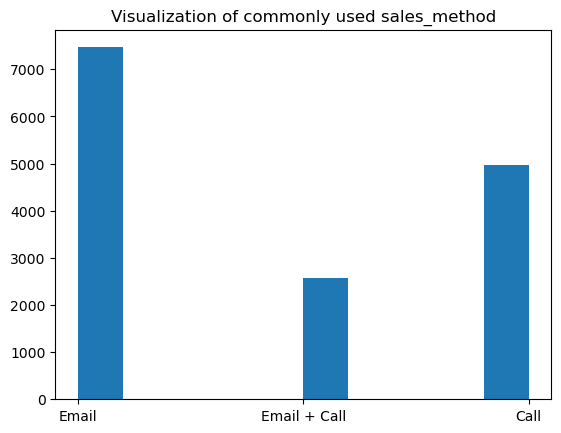

In [82]:
plt.hist(df["sales_method"])
plt.title("Visualization of commonly used sales_method")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   customer_id        15000 non-null  object  
 3   nb_sold            15000 non-null  int64   
 4   revenue            13926 non-null  float64 
 5   years_as_customer  15000 non-null  int64   
 6   nb_site_visits     15000 non-null  int64   
 7   state              15000 non-null  object  
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 835.2+ KB


In [84]:
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [85]:
#missing value
df.isna()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False


In [86]:
#missing value
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [87]:
print(df["state"].unique())

['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


In [88]:
#checked for empty strings
empty_count = (df['state'] == '').sum()
print(f"Empty strings: {empty_count}")

Empty strings: 0


In [89]:
#Check for null or missing values
null_count = df['state'].isnull().sum()
print(f"Null values: {null_count}")

Null values: 0


In [90]:
#Check for leading or trailing whitespace:

whitespace_count = df['state'].str.strip().nunique() - df['state'].nunique()
print(f"Leading/trailing whitespace: {whitespace_count}")


Leading/trailing whitespace: 0


In [ ]:
#df['state'] = df['state'].str.replace(r'\s+', '')

In [ ]:
#df['state'] = df['state'].str.strip()

In [91]:
#Check for invalid characters
invalid_char_count = (~df['state'].str.match('^[a-zA-Z ]+$')).sum()
print(f"Invalid characters: {invalid_char_count}")

Invalid characters: 0


In [92]:
df_new = df.drop('customer_id', axis=1)     #drop unnecessary column(2)

In [93]:
df_new.shape

(15000, 7)

In [94]:
df_new.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,NaN,0,24,Arizona
1,6,Email + Call,15,225.47,1,28,Kansas
2,5,Call,11,52.55,6,26,Wisconsin
3,4,Email,11,NaN,3,25,Indiana
4,3,Email,9,90.49,0,28,Illinois


In [96]:
df_new.dtypes

week                    int64
sales_method         category
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                  object
dtype: object

In [97]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   nb_sold            15000 non-null  int64   
 3   revenue            13926 non-null  float64 
 4   years_as_customer  15000 non-null  int64   
 5   nb_site_visits     15000 non-null  int64   
 6   state              15000 non-null  object  
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 718.0+ KB


In [98]:
#week column

#Check for negative values:

if (df_new['week'] < 0).any():
    print("Negative values found in number_of_sold column")
    # Handle/Resolve: Replace with 0 or remove rows
    #df_new['week'] = df_new['week'].apply(lambda x: 0 if x < 0 else x)
else:
    print("Negative values not found")


Negative values not found


In [99]:
# Check for non-numeric values:


if df_new['week'].apply(lambda x: not isinstance(x, (int, float))).any():
    print("Non-numeric values found in week")
else:
    print("Non numeric values not found")


Non numeric values not found


In [202]:
#Replace with NaN:

#df_new['week'] = pd.to_numeric(df_new['week'], errors='coerce')

#Replace with mean/median/mode:

#df_new['week'] = df_new['week'].fillna(df_new['week'].mean())  # replace with mean
#df['column'] = df['column'].fillna(df['column'].median())   replace with median
#df['column'] = df['column'].fillna(df['column'].mode()[0])  replace with mode

#Replace with a specific value:

#df_new['week'] = df_new['week'].fillna(0)  # replace with 0

#Drop rows with non-numeric values:

#df = df[df['column'].apply(lambda x: isinstance(x, (int, float)))]

#Convert to numeric using regex:

#import re
#df_new['week'] = df_new['week'].apply(lambda x: float(re.sub(r'[^\d\.]', '', x)))






In [100]:
#sales_method column

#Check for invalid or unknown values:

df_new['sales_method']= df_new['sales_method'].astype(str)


In [101]:
if df_new['sales_method'].isin(['invalid', 'unknown']).any():
    print("Invalid or unknown values found in sales_method column")
else:
    print("It's fine")
    # Handle/Resolve: Replace with suitable values or remove rows
    #df['sales_method'] = df['sales_method'].replace(['invalid', 'unknown'], 'Other')


It's fine


In [102]:
# Check for consistent formatting:


if df_new['sales_method'].str.contains('[^a-zA-Z]').any():
    print("Non-alphabetic characters found in sales_method column")
    #df_new['sales_method'] = df_new['sales_method'].str.replace('[^a-zA-Z]', '')
    

Non-alphabetic characters found in sales_method column


Text(0.5, 1.0, 'Visualization of commonly used sales_method')

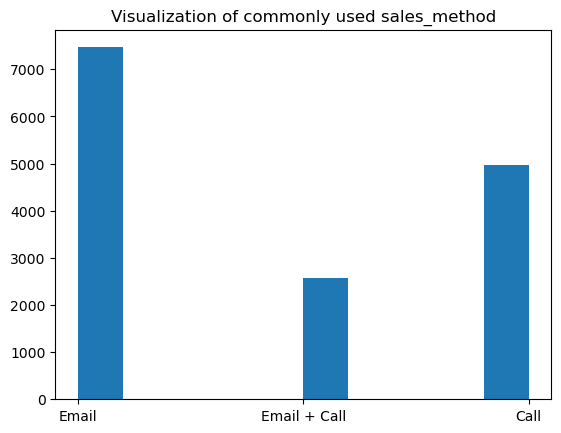

In [103]:
plt.hist(df["sales_method"])
plt.title("Visualization of commonly used sales_method")

In [104]:
if df_new['sales_method'].str.contains('[^a-zA-Z]').any():
    print("Non-alphabetic characters found in sales_method column")

Non-alphabetic characters found in sales_method column


In [105]:
df_new.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,NaN,0,24,Arizona
1,6,Email + Call,15,225.47,1,28,Kansas
2,5,Call,11,52.55,6,26,Wisconsin
3,4,Email,11,NaN,3,25,Indiana
4,3,Email,9,90.49,0,28,Illinois


In [106]:
#nb_sold column

#Check for negative values:

if (df_new['nb_sold'] < 0).any():
    print("Negative values found in nb_sold column")
else:
    print("Negative values were not found in the nb_sold column")
   # Handle/Resolve: Replace with 0 or remove rows
    #df_new['nb_sold'] = df_new['nb_sold'].apply(lambda x: 0 if x < 0 else x) 

Negative values were not found in the nb_sold column


In [107]:
# Check for non-numeric values:

non_numeric = df_new['nb_sold'].apply(lambda x: not isinstance(x, (int, float)))
non_numeric_values = df_new["nb_sold"][non_numeric]
print(non_numeric_values)

Series([], Name: nb_sold, dtype: int64)


In [108]:
df_new.isna().sum()

week                    0
sales_method            0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [109]:
mean_value = df_new['revenue'].mean()
df_new['revenue'] = df_new['revenue'].fillna(mean_value)

In [110]:
df_new.isna().sum()

week                 0
sales_method         0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [111]:
df_new.shape

(15000, 7)

In [112]:
df_new.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,93.934943,0,24,Arizona
1,6,Email + Call,15,225.470000,1,28,Kansas
2,5,Call,11,52.550000,6,26,Wisconsin
3,4,Email,11,93.934943,3,25,Indiana
4,3,Email,9,90.490000,0,28,Illinois


In [113]:
if (df_new['revenue'] < 0).any():
    print("Negative values found in revenue column")
else:
    print("Negative values were not found in the revenue column")
   # Handle/Resolve: Replace with 0 or remove rows
    #df_new['nb_sold'] = df_new['nb_sold'].apply(lambda x: 0 if x < 0 else x) 

Negative values were not found in the revenue column


In [114]:
non_numeric = df_new['revenue'].apply(lambda x: not isinstance(x, (int, float)))
non_numeric_values = df_new['revenue'][non_numeric]
print(non_numeric_values)

Series([], Name: revenue, dtype: float64)


In [68]:
#this is used, should non-numeric values were found
#df_new['revenue'] = pd.to_numeric(df_new['revenue'], errors='coerce')


In [115]:
#Checking for Negative values 

if (df_new['years_as_customer'] < 0).any():
    print("Negative values found in years_as_customer column")
else:
    print("Negative values were not found in the years_as_customer column")

Negative values were not found in the years_as_customer column


In [116]:
#Checking for non-numeric values
    
non_numeric = df_new['years_as_customer'].apply(lambda x: not isinstance(x, (int, float)))
non_numeric_values = df_new['years_as_customer'][non_numeric]
print(non_numeric_values)  # prints the non-numeric values
    

Series([], Name: years_as_customer, dtype: int64)


In [117]:
df_new.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,93.934943,0,24,Arizona
1,6,Email + Call,15,225.470000,1,28,Kansas
2,5,Call,11,52.550000,6,26,Wisconsin
3,4,Email,11,93.934943,3,25,Indiana
4,3,Email,9,90.490000,0,28,Illinois


In [118]:
#nb_site_visits column

#checking for negative values

if (df_new['nb_site_visits'] < 0).any():
    print("Negative values found in years_as_customer column")
else:
    print("Negative values were not found in the nb_site_visits column")

Negative values were not found in the nb_site_visits column


In [119]:
non_numeric = df_new['nb_site_visits'].apply(lambda x: not isinstance(x, (int, float)))
non_numeric_values = df_new['nb_site_visits'][non_numeric]
print(non_numeric_values)  # prints the non-numeric values

Series([], Name: nb_site_visits, dtype: int64)


In [120]:
#state

#Check for invalid or unknown values:

if df_new['state'].isin(['invalid', 'unknown']).any():
    print("Invalid or unknown values found in state column")
    # Handle/Resolve: Replace with suitable values or remove rows
    #df_new['state'] = df_new['state'].replace(['invalid', 'unknown'], 'Other')



In [121]:
#Check for consistent formatting:


print(df_new['state'].str.contains('[^a-zA-Z]').any())
    #print("Non-alphabetic characters found in state column")
    # Handle/Resolve: Remove non-alphabetic characters
    #df_new['state'] = df_new['state'].str


True


In [122]:
print(df_new['state'].str.replace('[^a-zA-Z]', ''))

0              Arizona
1               Kansas
2            Wisconsin
3              Indiana
4             Illinois
             ...      
14995     Pennsylvania
14996           Kansas
14997    West Virginia
14998       New Jersey
14999         Illinois
Name: state, Length: 15000, dtype: object


In [123]:
print(df_new['state'].str.contains('[^a-zA-Z]').any())

True


In [124]:
df_new['state'] = df_new['state'].str.replace('[^a-zA-Z]', '')


# Using the re.sub() method:
#import re

df_new['state'] = df_new['state'].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))

#Using the str.extract() method:

#import re

df_new['state'] = df_new['state'].str.extract('([a-zA-Z]+)', expand=False)

# Using the str.contains() method:

df_new['state'] = df_new['state'][df_new['state'].str.contains('[a-zA-Z]')]


In [125]:
if df_new['state'].str.contains('[^a-zA-Z]').any():
    print("Non-alphabetic characters found in state column")
    # Handle/Resolve: Remove non-alphabetic characters
    #df_new['state'] = df_new['state'].str

In [126]:
print(df_new['state'].str.contains('[^a-zA-Z]').any())

False


In [127]:
df_new['sales_method'] = df_new['sales_method'].astype('category')    #convert to data type

In [128]:
df_new.dtypes

week                    int64
sales_method         category
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                  object
dtype: object

In [129]:
df_new["sales_method"].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

In [130]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   nb_sold            15000 non-null  int64   
 3   revenue            15000 non-null  float64 
 4   years_as_customer  15000 non-null  int64   
 5   nb_site_visits     15000 non-null  int64   
 6   state              15000 non-null  object  
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 718.0+ KB


In [131]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   nb_sold            15000 non-null  int64   
 3   revenue            15000 non-null  float64 
 4   years_as_customer  15000 non-null  int64   
 5   nb_site_visits     15000 non-null  int64   
 6   state              15000 non-null  object  
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 718.0+ KB


In [368]:
#df_new.drop(df_new[df_new['sales_method'] == 'em + call'].index, inplace=True)

In [369]:
#df_new.drop(df_new[df_new['sales_method'] == 'email'].index, inplace=True)

In [133]:
df_new['sales_method'] = df_new['sales_method'].astype('category') 

In [134]:
df_new['sales_method'].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

In [135]:
assert df_new['sales_method'].dtype == 'category'

In [136]:
df_new.isna().sum()

week                 0
sales_method         0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [137]:
df_new.duplicated().sum() 

16

In [138]:
df_new = df_new.drop_duplicates()

In [139]:
df_new.duplicated().sum()

0

In [140]:
df_new["sales_method"].value_counts()

sales_method
Email           7456
Call            4959
Email + Call    2569
Name: count, dtype: int64

In [141]:
df_new.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,93.934943,0,24,Arizona
1,6,Email + Call,15,225.470000,1,28,Kansas
2,5,Call,11,52.550000,6,26,Wisconsin
3,4,Email,11,93.934943,3,25,Indiana
4,3,Email,9,90.490000,0,28,Illinois


In [142]:
df_new.shape

(14984, 7)

In [143]:
#Handling Outliers

Q1 = df_new['revenue'].quantile(0.25) 
Q3 = df_new['revenue'].quantile(0.75) 
IQR = Q3 - Q1 
df_new_n = df_new[~((df_new['revenue'] < (Q1 - 1.5 * IQR)) | (df_new['revenue'] > (Q3 + 1.5 * IQR)))]

print(df_new_n)

       week  sales_method  nb_sold    revenue  years_as_customer  \
0         2         Email       10  93.934943                  0   
2         5          Call       11  52.550000                  6   
3         4         Email       11  93.934943                  3   
4         3         Email        9  90.490000                  0   
5         6          Call       13  65.010000                 10   
...     ...           ...      ...        ...                ...   
14995     4          Call       10  50.820000                  0   
14996     5          Call       10  52.330000                  1   
14997     1          Call        7  34.870000                  4   
14998     6          Call       13  64.900000                  2   
14999     5  Email + Call       13  93.934943                  4   

       nb_site_visits         state  
0                  24       Arizona  
2                  26     Wisconsin  
3                  25       Indiana  
4                  28      Illi

In [144]:
print(df_new_n.head())

   week sales_method  nb_sold    revenue  years_as_customer  nb_site_visits  \
0     2        Email       10  93.934943                  0              24   
2     5         Call       11  52.550000                  6              26   
3     4        Email       11  93.934943                  3              25   
4     3        Email        9  90.490000                  0              28   
5     6         Call       13  65.010000                 10              24   

         state  
0      Arizona  
2    Wisconsin  
3      Indiana  
4     Illinois  
5  Mississippi  


In [145]:
df_new_n.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000
mean,2.925193,9.812554,85.599439,5.029880,24.764761
std,1.576927,1.525130,34.663950,5.081722,3.426442
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.490000,1.000000,22.000000
50%,3.000000,10.000000,89.555000,4.000000,25.000000
75%,4.000000,11.000000,101.922500,7.000000,27.000000
max,6.000000,16.000000,185.620000,63.000000,41.000000


In [146]:
df_new_n['sales_method'].value_counts()

sales_method
Email           7456
Call            4959
Email + Call    1541
Name: count, dtype: int64

In [147]:
df_new_n["nb_sold"].sum()   #total number of products sold

136944

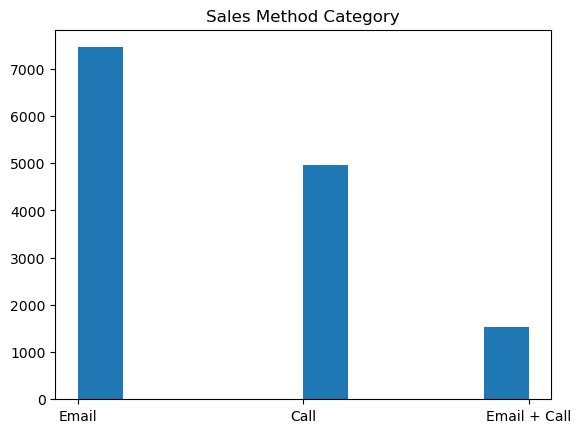

In [148]:
plt.hist(df_new_n["sales_method"])
plt.title("Sales Method Category")
plt.show()

In [149]:
df_new_n.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,93.934943,0,24,Arizona
2,5,Call,11,52.550000,6,26,Wisconsin
3,4,Email,11,93.934943,3,25,Indiana
4,3,Email,9,90.490000,0,28,Illinois
5,6,Call,13,65.010000,10,24,Mississippi


In [150]:
df_new_n.groupby('sales_method')['revenue'].agg(['sum', "mean", "count"]).sort_values('sum', ascending=False)


#"Email" generated highest sum of revenue

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\4151481002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_n.groupby('sales_method')['revenue'].agg(['sum', "mean", "count"]).sort_values('sum', ascending=False)


,sum,mean,count
sales_method,,,
Email,722475.589209,96.898550,7456
Call,244431.244602,49.290430,4959
Email + Call,227718.935066,147.773482,1541


In [151]:
df_new_n.groupby('sales_method')['revenue'].agg(['sum', "mean", "count"]).sort_values('mean', ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\3999952196.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_n.groupby('sales_method')['revenue'].agg(['sum', "mean", "count"]).sort_values('mean', ascending=False)


,sum,mean,count
sales_method,,,
Email + Call,227718.935066,147.773482,1541
Email,722475.589209,96.898550,7456
Call,244431.244602,49.290430,4959


In [152]:
df_new_n.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,93.934943,0,24,Arizona
2,5,Call,11,52.550000,6,26,Wisconsin
3,4,Email,11,93.934943,3,25,Indiana
4,3,Email,9,90.490000,0,28,Illinois
5,6,Call,13,65.010000,10,24,Mississippi


In [153]:
df_new_n.groupby('sales_method')['nb_sold'].agg(['sum', "mean", "count"]).sort_values('sum', ascending=False)
#in terms of total number of sold and ,Email is the most efficient sales method

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\962518065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_n.groupby('sales_method')['nb_sold'].agg(['sum', "mean", "count"]).sort_values('sum', ascending=False)


,sum,mean,count
sales_method,,,
Email,72540,9.729077,7456
Call,47161,9.510184,4959
Email + Call,17243,11.189487,1541


In [154]:
df_new_n.groupby('sales_method')['nb_sold'].agg(['sum', "mean", "count"]).sort_values('mean', ascending=False)

#In terms of average number of sold products, Email + Call is the most efficient sales method

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\588210778.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_n.groupby('sales_method')['nb_sold'].agg(['sum', "mean", "count"]).sort_values('mean', ascending=False)


,sum,mean,count
sales_method,,,
Email + Call,17243,11.189487,1541
Email,72540,9.729077,7456
Call,47161,9.510184,4959


In [155]:
df_new_n.groupby('sales_method')['nb_sold'].agg(['sum', "mean", "count"]).sort_values('count', ascending=False)


C:\Users\USER\AppData\Local\Temp\ipykernel_9632\357378878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_n.groupby('sales_method')['nb_sold'].agg(['sum', "mean", "count"]).sort_values('count', ascending=False)


,sum,mean,count
sales_method,,,
Email,72540,9.729077,7456
Call,47161,9.510184,4959
Email + Call,17243,11.189487,1541


In [156]:
df_new_n.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,93.934943,0,24,Arizona
2,5,Call,11,52.550000,6,26,Wisconsin
3,4,Email,11,93.934943,3,25,Indiana
4,3,Email,9,90.490000,0,28,Illinois
5,6,Call,13,65.010000,10,24,Mississippi


In [157]:
df_new_n.groupby('sales_method')['nb_site_visits'].count().sort_values(ascending=False)

#The most effective method in terms of total number of site visits is "Email"

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\1026506444.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_n.groupby('sales_method')['nb_site_visits'].count().sort_values(ascending=False)


sales_method
Email           7456
Call            4959
Email + Call    1541
Name: nb_site_visits, dtype: int64

In [158]:
df_new_n['nb_sold'].corr(df_new['nb_site_visits'], method='spearman')


#corr between nb_sold & nb_site_visits: moderate correlation coefficient. As number of site visits increases, number of sold products increases moderately

0.44666334815901804

In [159]:
df_new_n['revenue'].corr(df_new['nb_site_visits'], method='spearman') 

#Weak correlation coefficient between revenue & nb_site_visits

0.24957108372136172

In [160]:
df_new_n.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,93.934943,0,24,Arizona
2,5,Call,11,52.550000,6,26,Wisconsin
3,4,Email,11,93.934943,3,25,Indiana
4,3,Email,9,90.490000,0,28,Illinois
5,6,Call,13,65.010000,10,24,Mississippi


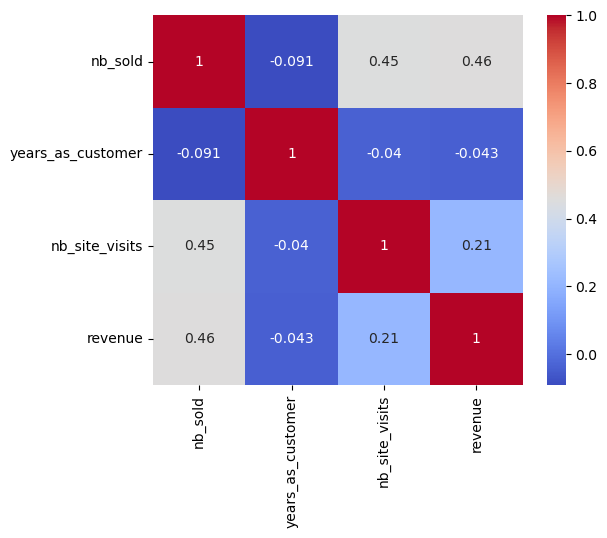

In [161]:
sns.heatmap(df_new_n[['nb_sold', "years_as_customer", "nb_site_visits", "revenue"]].corr(), annot=True, cmap='coolwarm', square=True)
plt.show()

#nb_sites_visits is moderately correlsted with nb_sold. It is imperative to engage in aggresive marketing or serious awareness creation, because the more the number of years a customer has been with the company the the lower the revenue generated and number sold products to such customer

In [162]:
df_new_n.groupby(["sales_method", "state"])[["revenue", "nb_sold"]].sum().sort_values(["revenue", "nb_sold"], ascending=False)

#sales_method for least performing states(North Dakota,Vermont, Delaware ), in terms of revenue generation, is Call

#sales_method for best performing states(Califonia and Texas), in terms of revenue generation, is either Email + Call or Email

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\2005667988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new_n.groupby(["sales_method", "state"])[["revenue", "nb_sold"]].sum().sort_values(["revenue", "nb_sold"], ascending=False)


revenue  nb_sold
sales_method state                              
Email        California    89067.476323     8936
             Texas         57936.632874     5822
             NewYork       46139.317587     4639
             Florida       43401.677702     4365
Call         California    31673.883794     6130
...                                 ...      ...
             Vermont         383.490000       77
             NorthDakota     353.610000       70
Email + Call NorthDakota     242.424943       22
             Maine           180.080000       12
             NewHampshire    149.470000       10

[150 rows x 2 columns]

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


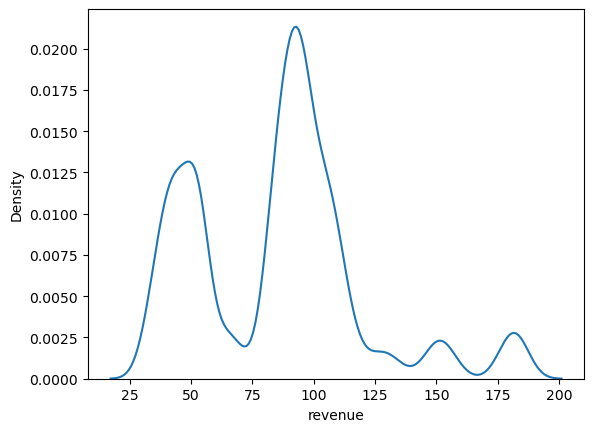

In [163]:
sns.kdeplot(data=df_new_n['revenue'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\2211640759.py:1: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.relplot(x='revenue', y='nb_site_visits', hue="sales_method", style='sales_method', markers=['o', 's'], alpha=0.5, data=df_new_n)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


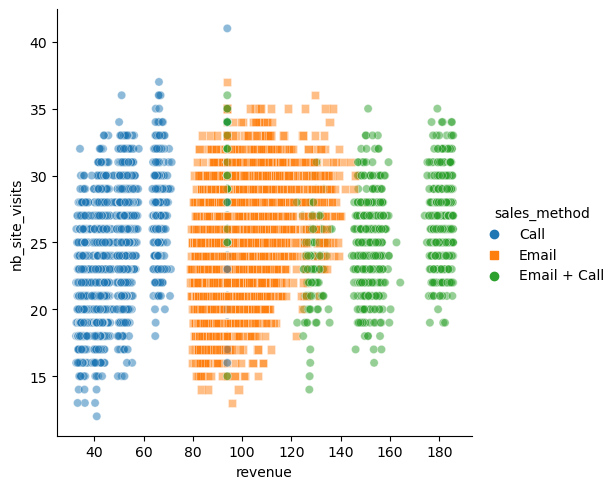

In [164]:
sns.relplot(x='revenue', y='nb_site_visits', hue="sales_method", style='sales_method', markers=['o', 's'], alpha=0.5, data=df_new_n)
plt.show()

#more revenue was generated using combination of Call + Email

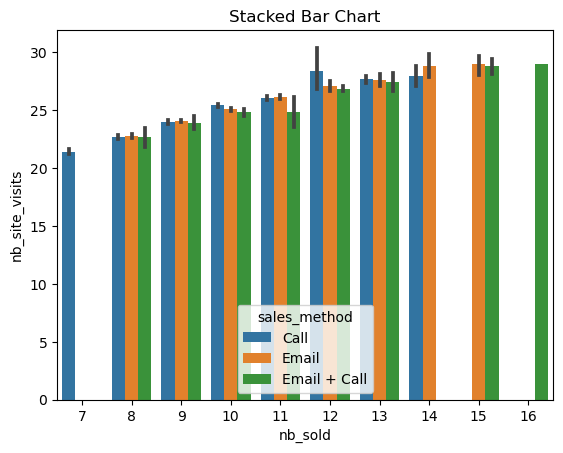

In [165]:
fig, ax = plt.subplots()
sns.barplot(x='nb_sold', y="nb_site_visits", hue='sales_method', data=df_new_n, ax=ax)
ax.set_title('Stacked Bar Chart')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


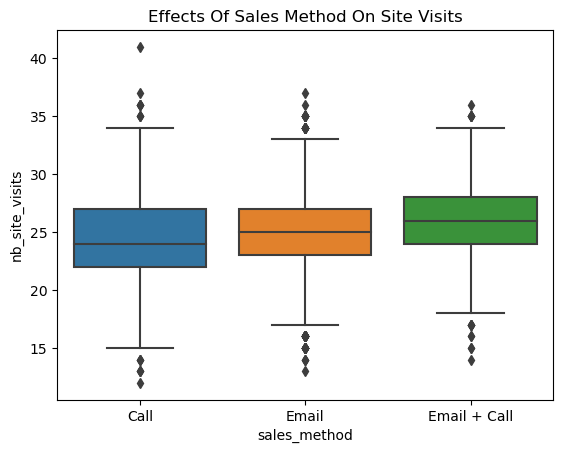

In [166]:
sns.boxplot(x='sales_method', y='nb_site_visits', data=df_new_n)

plt.title('Effects Of Sales Method On Site Visits')
plt.xlabel('sales_method')
plt.ylabel('nb_site_visits')

plt.show()#Customers who were contacted through combination of Email & Call visit the site more than any other means

In [167]:
df_new_n

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,10,93.934943,0,24,Arizona
2,5,Call,11,52.550000,6,26,Wisconsin
3,4,Email,11,93.934943,3,25,Indiana
4,3,Email,9,90.490000,0,28,Illinois
5,6,Call,13,65.010000,10,24,Mississippi
...,...,...,...,...,...,...,...
14995,4,Call,10,50.820000,0,22,Pennsylvania
14996,5,Call,10,52.330000,1,27,Kansas
14997,1,Call,7,34.870000,4,22,WestVirginia
14998,6,Call,13,64.900000,2,27,NewJersey


In [168]:
print(df_new_n)

       week  sales_method  nb_sold    revenue  years_as_customer  \
0         2         Email       10  93.934943                  0   
2         5          Call       11  52.550000                  6   
3         4         Email       11  93.934943                  3   
4         3         Email        9  90.490000                  0   
5         6          Call       13  65.010000                 10   
...     ...           ...      ...        ...                ...   
14995     4          Call       10  50.820000                  0   
14996     5          Call       10  52.330000                  1   
14997     1          Call        7  34.870000                  4   
14998     6          Call       13  64.900000                  2   
14999     5  Email + Call       13  93.934943                  4   

       nb_site_visits         state  
0                  24       Arizona  
2                  26     Wisconsin  
3                  25       Indiana  
4                  28      Illi

In [169]:
df_new_n["Revenue_per_Site_Visits"] = df_new_n['revenue'] / df_new_n['nb_site_visits']

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\2038542637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_n["Revenue_per_Site_Visits"] = df_new_n['revenue'] / df_new_n['nb_site_visits']


In [170]:
print(df_new_n.head())

   week sales_method  nb_sold    revenue  years_as_customer  nb_site_visits  \
0     2        Email       10  93.934943                  0              24   
2     5         Call       11  52.550000                  6              26   
3     4        Email       11  93.934943                  3              25   
4     3        Email        9  90.490000                  0              28   
5     6         Call       13  65.010000                 10              24   

         state  Revenue_per_Site_Visits  
0      Arizona                 3.913956  
2    Wisconsin                 2.021154  
3      Indiana                 3.757398  
4     Illinois                 3.231786  
5  Mississippi                 2.708750  


In [171]:
#Average Revenue Per site Visits: It's a useful metric to evaluate the effectiveness of your website in
#generating revenue.

df_new_n["Revenue_per_Site_Visits"].describe() 

count    13956.000000
mean         3.482271
std          1.397923
min          1.067187
25%          2.131600
50%          3.587689
75%          4.211446
max          9.595625
Name: Revenue_per_Site_Visits, dtype: float64

In [172]:
#Site Visit Conversion Rate: is a way to measure the percentage of users or customer prospects who complete a desired action, 
#such as making a purchase, registering an account or starting a free trial. Tracking this metric can help you get a feel of 
#how well your marketing strategy is working.

df_new_n["Site_Visit_Conversion_Rate"] = df_new_n["nb_sold"] / df_new_n["nb_site_visits"]
df_new_n.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\3255521306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_n["Site_Visit_Conversion_Rate"] = df_new_n["nb_sold"] / df_new_n["nb_site_visits"]


,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state,Revenue_per_Site_Visits,Site_Visit_Conversion_Rate
0,2,Email,10,93.934943,0,24,Arizona,3.913956,0.416667
2,5,Call,11,52.550000,6,26,Wisconsin,2.021154,0.423077
3,4,Email,11,93.934943,3,25,Indiana,3.757398,0.440000
4,3,Email,9,90.490000,0,28,Illinois,3.231786,0.321429
5,6,Call,13,65.010000,10,24,Mississippi,2.708750,0.541667


In [177]:
df_new_n["Site_Visit_Conversion_Rate"].describe()

count    13956.000000
mean         0.400223
std          0.063015
min          0.218750
25%          0.357143
50%          0.392857
75%          0.434783
max          0.769231
Name: Site_Visit_Conversion_Rate, dtype: float64

In [178]:
df_new_n.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state,Revenue_per_Site_Visits,Site_Visit_Conversion_Rate,previous_numbr_of_sold
0,2,Email,10,93.934943,0,24,Arizona,3.913956,0.416667,NaN
2,5,Call,11,52.550000,6,26,Wisconsin,2.021154,0.423077,10.0
3,4,Email,11,93.934943,3,25,Indiana,3.757398,0.440000,11.0
4,3,Email,9,90.490000,0,28,Illinois,3.231786,0.321429,11.0
5,6,Call,13,65.010000,10,24,Mississippi,2.708750,0.541667,9.0


In [180]:
df_new_n['previous_numbr_of_sold'] = df_new_n['previous_numbr_of_sold'].fillna(0)

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\4207256685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_n['previous_numbr_of_sold'] = df_new_n['previous_numbr_of_sold'].fillna(0)


In [181]:
df_new_n

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state,Revenue_per_Site_Visits,Site_Visit_Conversion_Rate,previous_numbr_of_sold
0,2,Email,10,93.934943,0,24,Arizona,3.913956,0.416667,0.0
2,5,Call,11,52.550000,6,26,Wisconsin,2.021154,0.423077,10.0
3,4,Email,11,93.934943,3,25,Indiana,3.757398,0.440000,11.0
4,3,Email,9,90.490000,0,28,Illinois,3.231786,0.321429,11.0
5,6,Call,13,65.010000,10,24,Mississippi,2.708750,0.541667,9.0
...,...,...,...,...,...,...,...,...,...,...
14995,4,Call,10,50.820000,0,22,Pennsylvania,2.310000,0.454545,11.0
14996,5,Call,10,52.330000,1,27,Kansas,1.938148,0.370370,10.0
14997,1,Call,7,34.870000,4,22,WestVirginia,1.585000,0.318182,10.0
14998,6,Call,13,64.900000,2,27,NewJersey,2.403704,0.481481,7.0


In [182]:
df_new_n['Customer_Lifetime_Revenue'] = df_new_n['revenue'] * df_new_n["years_as_customer"]

print(df_new_n.head())

   week sales_method  nb_sold    revenue  years_as_customer  nb_site_visits  \
0     2        Email       10  93.934943                  0              24   
2     5         Call       11  52.550000                  6              26   
3     4        Email       11  93.934943                  3              25   
4     3        Email        9  90.490000                  0              28   
5     6         Call       13  65.010000                 10              24   

         state  Revenue_per_Site_Visits  Site_Visit_Conversion_Rate  \
0      Arizona                 3.913956                    0.416667   
2    Wisconsin                 2.021154                    0.423077   
3      Indiana                 3.757398                    0.440000   
4     Illinois                 3.231786                    0.321429   
5  Mississippi                 2.708750                    0.541667   

   previous_numbr_of_sold  Customer_Lifetime_Revenue  
0                     0.0                  

C:\Users\USER\AppData\Local\Temp\ipykernel_9632\357190987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_n['Customer_Lifetime_Revenue'] = df_new_n['revenue'] * df_new_n["years_as_customer"]


In [183]:
#Customer Lifetime Revenue: Customer lifetime value (CLV) is a business metric used to determine the amount of money customers
#will spend on your products or service over time. Rather than looking at the value of individual transactions, this value takes
#into account all potential transactions to be made during a customer relationship timespan and calculates the specific revenue 
#from that customer.

print(df_new_n["Customer_Lifetime_Revenue"].describe())

count    13956.000000
mean       422.915782
std        484.316551
min          0.000000
25%        103.555000
50%        268.455000
75%        563.609655
max       6124.860000
Name: Customer_Lifetime_Revenue, dtype: float64


In [184]:
grouped_data = df_new_n.groupby("sales_method")["Revenue_per_Site_Visits"].sum().reset_index()

# sort in descending order
sorted_data = grouped_data.sort_values("Revenue_per_Site_Visits", ascending=False)

print(sorted_data)


   sales_method  Revenue_per_Site_Visits
1         Email             29567.633964
0          Call             10103.834760
2  Email + Call              8927.108976


C:\Users\USER\AppData\Local\Temp\ipykernel_9632\3617008104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_new_n.groupby("sales_method")["Revenue_per_Site_Visits"].sum().reset_index()


In [185]:
grouped_data = df_new_n.groupby("sales_method")["years_as_customer"].sum().reset_index()  #customer retention rate

# sort in descending order
sorted_data = grouped_data.sort_values("years_as_customer", ascending=False)

print(sorted_data)


   sales_method  years_as_customer
1         Email              37186
0          Call              25683
2  Email + Call               7328


C:\Users\USER\AppData\Local\Temp\ipykernel_9632\3605670671.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_new_n.groupby("sales_method")["years_as_customer"].sum().reset_index()  #customer retention rate


In [186]:
df_new_n["Site_Visit_Conversion_Rate"].mean()   #Average site visit conversion rate is 0.4, which is poor

0.40022312457546383

In [187]:
df_new_n.head()

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state,Revenue_per_Site_Visits,Site_Visit_Conversion_Rate,previous_numbr_of_sold,Customer_Lifetime_Revenue
0,2,Email,10,93.934943,0,24,Arizona,3.913956,0.416667,0.0,0.000000
2,5,Call,11,52.550000,6,26,Wisconsin,2.021154,0.423077,10.0,315.300000
3,4,Email,11,93.934943,3,25,Indiana,3.757398,0.440000,11.0,281.804828
4,3,Email,9,90.490000,0,28,Illinois,3.231786,0.321429,11.0,0.000000
5,6,Call,13,65.010000,10,24,Mississippi,2.708750,0.541667,9.0,650.100000


In [188]:
df_new_n['nb_sold'].corr(df['nb_site_visits'], method='spearman')    #moderate +ve correlation

0.44666334815901804

**DATA VALIDATION**: The provided dataset underwent thorough validation and cleaning to ensure accuracy and consistency. Here is the general steps taken in order to ensure that the data were ready for analysis were: 

**_data type check_**: Ensure that each column contains the expected data type (e.g., numeric, categorical, etc.).
    - Anomaly handling: If a column contains an unexpected data type, convert it to the correct type or remove rows with incorrect data types. 

**_missing value check_**: This is the most appropriate step to be taken first, especially for numeric data. As misisng values can lead to errors or biases in analysis if not handled properly.  

**outlier detection**

_**data range check**_: Ensure that values in each column fall within expected ranges.
    - Anomaly handling: Remove values outside the expected range, truncate them to the range boundaries, or use data transformation techniques (e.g., normalization).


_**data consistency check**_Ensure that categorical values are consistent and follow expected patterns.
    - Anomaly handling: Correct inconsistent values to the expected values, or remove rows with inconsistent values.

**_data distribution check_** Ensure that data distributions are as expected (e.g., normal, uniform, etc.).- Anomaly handling: Transform the data (e.g., normalization, standardization), or use robust statistical methods to account for non-normality.
 
**_correlation analysis_** Identify strong correlations between columns.
    - Anomaly handling: Remove one of the correlated columns to avoid multicollinearity issues in modeling.

_**data quality metrics(data completeness)**_ Assess the overall quality of the data.
    - Anomaly handling: Address issues (e.g., low completeness, high inconsistency) before proceeding with analysis.

**_visual inspection_** Visually examine the data to identify potential issues.
    - Anomaly handling: Address issues (e.g., outliers, non-normality) using appropriate techniques (e.g., data transformation, outlier removal).

**_data profiling(using summary statistics)_** Gain a deeper understanding of the data distribution and summary statistics.
    - Anomaly handling: Address issues (e.g., skewness, kurtosis).
    
Here are the steps taken in ensuring that every column in the dataset is validated and cleaned:

I checked for general information about each of the columns(like Dtype, missing values, descriptive statistics of numeric columns, whitespaces etc.). The only column with missing values is "revenue"

**week**: I checked for negative and non-numeric values, neither negative nor non-numeric values were found 

**sales_mthod**: I checked for invalid & unknown values and consistent formatting. Inconsistent(non-alphabetic characters were found in this column), and they were handled appropriately. Lastly, the dtype of this variable was converted to categorical data type, in order to enhance the suitability of the column to the intended purpose of the analysis. Visualize this column on histogram in order to have better understanding of this column. I filtered this dataframe in using those inconsistent values like : "em + call" & 'email. I checked for inconsistent categories/data/rows. Did value count of each category(value). I capitalize every first letter of each category(value) for uniformity. "Em + Call" was replaced by "Email + Call". 

**customer_id**: This column was dropped because it was not necessary to the analysis.

**nb_sold**: I checked for negative and non-numeric values, neither negative nor non-numeric values were found.

**revenue**: Missing values were found in this column, and were handled appropriately. I checked for negative and non-numeric values, neither negative nor non-numeric values were found.

**years_as_customer**: I checked for negative and non-numeric values, neither negative nor non-numeric values were found..

**nb_site_visits**: I checked for negative and non-numeric values, neither negative nor non-numeric values were found..

**state**: I checked for invalid & unknown values and consistent formatting. Invalid and unknown values were not found. But Inconsistent(non-alphabetic characters were found in this column), and they were handled appropriately. checked for empty strings/missing values/whitespace/invalid characters, non was found.

Here is the summary of the data cleaning steps used:

Checked for number of rows and columns Checked the first few rows (default is 5) of the dataframe, allowing us to quickly understand the data structure, column names, verify data loading, verify data quality(like: missing values, outliers, formatting errors etc) and get an idea of data distribution. Checked for missing values in the dataframe.

**Exploratory Analysis:** Histogram indicates that the most used sales method is Email, not the most effective boxplot indicates the Column 3 (customer_id): was dropped, because it was not necessary to the analysis Column 5 (revenue): There were missing values in this column. Missing values were filled with mean of the values in this column, because this works well for numeric(float) data. I checked for duplicate values. 16 duplicate values were detected, and dropped. Outliers were checked for, detected, and dropped The remaining columns(nb_sold, years_as_customer, nb_site_visits, state) had consistent values, at least as much as I could detect the most effective sales method is Email + Call Stacked bar chart displays that as nb_visits_site increases, nb_sold increases. Using pearson correlation, nb_visits_site increases vs nb_sold increases has moderate positive correlation Heatmap indicated that there is positive moderate correlation between site visites and number of sold products Heatmap indicated that there is negative correlation between years_as_customer and revenue. Relplot indicated that the most effective sales method is Email + Call

Findings:

When a relplot of revenue vs number of sites visits was also plotted, sales method was used as the hue. The most effective sales method is Email + Call according to the scatter diagram.

Email + Call has the highest total sum and average revenue generated.

States with the highest revenue generation are California and Texas, and the most sales method used is 'Email‘, probably because more Email messages were sent compared to Call or combination of Email + Call, according to the histogram. While states with least revenue generation used 'Call' as their sales method(which is the least effective method).

There is a moderate positive correlation between the number of site visits (nb_visits_site) and the number of sold items (nb_sold), indicating that as site visits increase, sold items also tend to increase.

Average Revenue Per site Visits(which is a useful metric to evaluate the effectiveness of the website) is $3.48. Unsurprisingly, the most effective sales method in this regard is Email, probably because more Email messages were sent compared to Call or a combination of Email + Call, according to the histogram.

Site Visit Conversion Rate (Tracking this metric can help us get a feel of how well your marketing strategy is working) is 40%. Not too bad, but it can definitely be better.

Average Customer lifetime value (ACLV) (this value takes into account all potential transactions to be made during a customer relationship timespan and calculates the specific revenue from that customer) is $422.92.

Final Summary: This data analysis report provides insights into the effectiveness of sales methods and the relationship between site visits and sold items, performance of each state, and the connection between each of the columns. The findings suggest that Email + Call was the most effective sales method, if the 3 categories of sales method were used the same number of times, and there is a moderate positive correlation between site visits and sold items. These insights can inform business decisions and guide marketing strategies to optimize sales and revenue.

Recommendation: Based on the findings, it is recommended to:

Focus on the Email + Call sales method as the primary approach. Invest in strategies to increase site visits, such as search engine optimization, social media marketing, and targeted advertising. Monitor and analyze the relationship between site visits and sold items to refine marketing strategies and optimize revenue. There is need for continuous awareness creation on the part of the marketing team to constantly bring new customers, as years as customer as negative correlation on number of sold items and revenue generation as indicated by the heat map. Continuously validate and clean the dataset to ensure accuracy and consistency. By implementing these recommendations, the business can potentially increase revenue and optimize sales performance.